In [780]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(17)
sns.set_theme(style="darkgrid")

# Analysis Questions
<ul>
<li>Stingy Vs Greedy (Wins)
<li>Station vs Utility
<li>Default vs greedy
<li>Default vs stingy
<li>All 5 combat

## Stingy VS Greedy


In [781]:
df = pd.read_csv("./data/greedyVsStingy.csv")
df.head()

,strategy,money,countries,utilities,stations,totalLandsOwned
0,STINGY,1487,2,0,1,3
1,STINGY,1373,5,1,1,7
2,GREEDY,1162,12,1,1,14
3,GREEDY,6097,16,1,3,20
4,GREEDY,1140,13,1,1,15


In [782]:
df.groupby("strategy").median()


,money,countries,utilities,stations,totalLandsOwned
strategy,,,,,
GREEDY,3514.0,16.0,2.0,3.0,20.0
STINGY,1492.0,3.0,0.0,1.0,4.0


It seems that on aveage Greedy has more lands of each type amd more money compared to Stingy

In [783]:
df['strategy'].value_counts(normalize=True)

GREEDY    0.588738
STINGY    0.411262
Name: strategy, dtype: float64

Greedy won nearly 59% of the time while Stingy won 41% of the time. But is this statistically significant?

In [784]:
diff = []
greedy_ps = []
stingy_ps = []
for _ in range(1000):
    bootsample = df.sample(df.shape[0], replace=True)
    greedy_p = bootsample['strategy'].value_counts()['GREEDY']/bootsample.shape[0]
    stingy_p = bootsample['strategy'].value_counts()['STINGY']/bootsample.shape[0]
    greedy_ps.append(greedy_p)
    stingy_ps.append(stingy_p)
    diff.append(greedy_p - stingy_p)

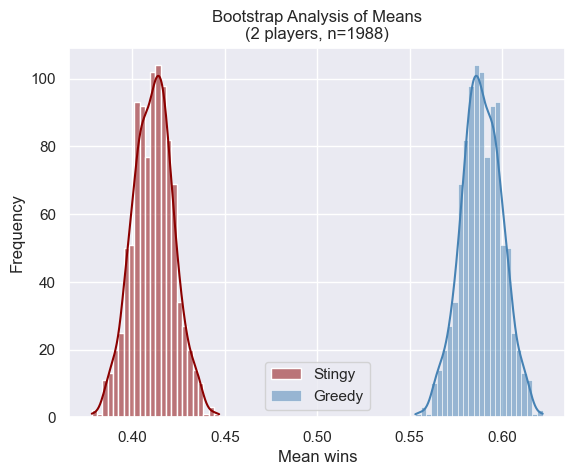

In [785]:
sns.histplot(stingy_ps, color='darkRed', kde=True, label="Stingy")
sns.histplot(greedy_ps, color='steelBlue', kde=True, label="Greedy")
plt.xlabel("Mean wins")
plt.ylabel("Frequency")
plt.title(f"Bootstrap Analysis of Means\n(2 players, n={df.shape[0]-1})")
plt.legend();

They seem to come from different distributions.

(0.10759024635495226, 0.12593288084464554)

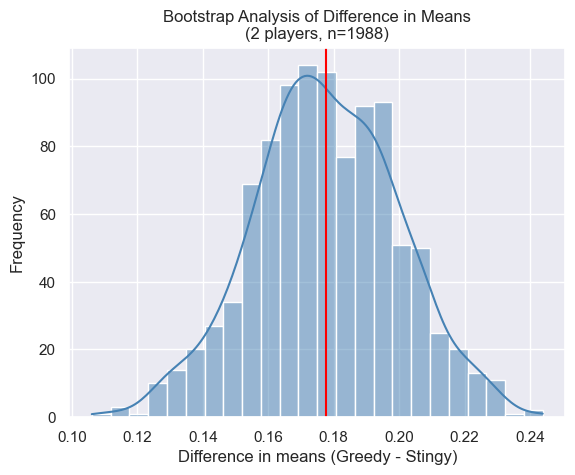

In [786]:
sns.histplot(diff, color='steelBlue', kde=True)
plt.xlabel("Difference in means (Greedy - Stingy)")
plt.ylabel("Frequency")
plt.title(f"Bootstrap Analysis of Difference in Means\n(2 players, n={df.shape[0]-1})")
plt.axvline(np.mean(diff), color='red')
np.percentile(diff, 0.025), np.percentile(diff, 0.975)

The 95% confidence interval (0.11, 0.126) does not contain 0. So with 95% confidence, Greedy wins on average more that Stingy.

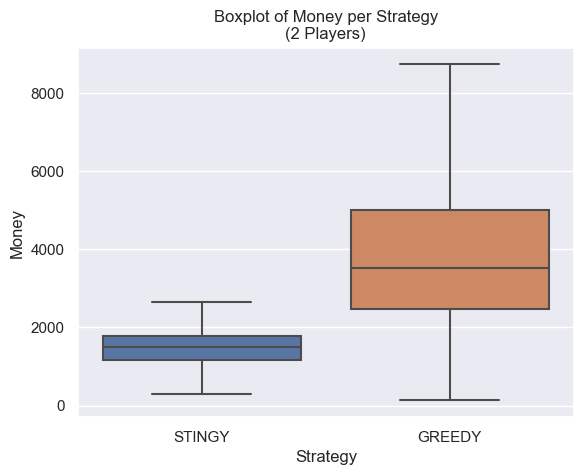

In [787]:
sns.boxplot(x='strategy', y='money', data=df, showfliers=False)
plt.title('Boxplot of Money per Strategy\n(2 Players)')
plt.xlabel('Strategy')
plt.ylabel('Money')
plt.show();

From the boxplot, on average, Stingy tends to end winning with less than 2000$ while Greedy tends to win with roughly 4000$.

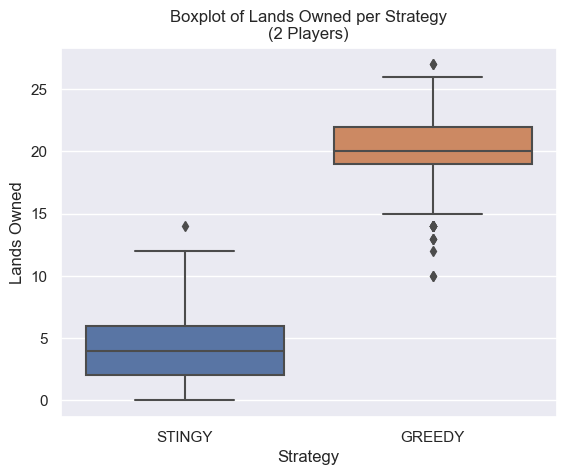

In [788]:
sns.boxplot(x='strategy', y='totalLandsOwned', data=df)
plt.title('Boxplot of Lands Owned per Strategy\n(2 Players)')
plt.xlabel('Strategy')
plt.ylabel('Lands Owned')
plt.show();

From the boxplot, on average, Stingy tends to win with less lands owned compared to Greedy

## Station Vs Utility

In [789]:
df = pd.read_csv("./data/stationGuyVsUtilityGuy.csv")
df.head()

,strategy,money,countries,utilities,stations,totalLandsOwned
0,STATION_GUY,596,6,0,3,9
1,UTILITY_GUY,514,5,1,3,9
2,STATION_GUY,14766,13,0,2,15
3,STATION_GUY,11620,13,1,4,18
4,UTILITY_GUY,12665,9,1,1,11


In [790]:
df.groupby("strategy").median()


,money,countries,utilities,stations,totalLandsOwned
strategy,,,,,
STATION_GUY,5448.0,11.0,1.0,3.0,14.0
UTILITY_GUY,9578.0,11.0,1.0,1.0,14.0


It seems that on average, the two strategies have the same number of lands owned of each type, however, Station Guy owns more stations.

In [791]:
df['strategy'].value_counts(normalize=True)

STATION_GUY    0.594828
UTILITY_GUY    0.405172
Name: strategy, dtype: float64

Station Guy won nearly 59% of the time while Utility Guy won 41% of the time. But is this statistically significant?

In [792]:
diff = []
greedy_ps = []
stingy_ps = []
for _ in range(1000):
    bootsample = df.sample(df.shape[0], replace=True)
    greedy_p = bootsample['strategy'].value_counts()['STATION_GUY']/bootsample.shape[0]
    stingy_p = bootsample['strategy'].value_counts()['UTILITY_GUY']/bootsample.shape[0]
    greedy_ps.append(greedy_p)
    stingy_ps.append(stingy_p)
    diff.append(greedy_p - stingy_p)

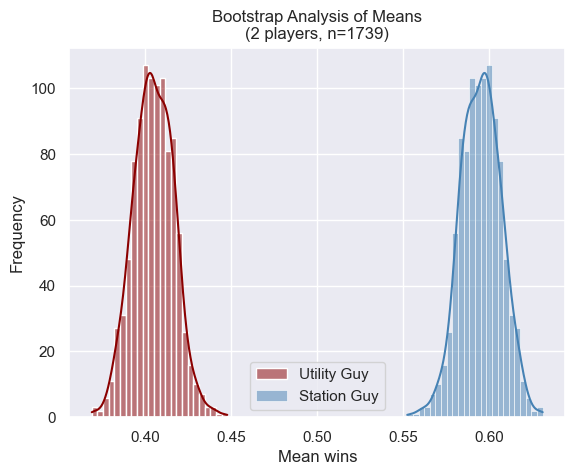

In [793]:
sns.histplot(stingy_ps, color='darkRed', kde=True, label="Utility Guy")
sns.histplot(greedy_ps, color='steelBlue', kde=True, label="Station Guy")
plt.xlabel("Mean wins")
plt.ylabel("Frequency")
plt.title(f"Bootstrap Analysis of Means\n(2 players, n={df.shape[0]-1})")
plt.legend();

They seem to come from different distributions.

(0.10632011494252869, 0.13418419540229884)

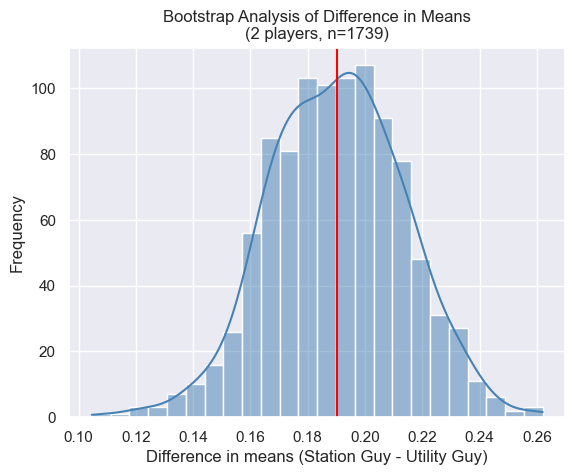

In [794]:
sns.histplot(diff, color='steelBlue', kde=True)
plt.xlabel("Difference in means (Station Guy - Utility Guy)")
plt.ylabel("Frequency")
plt.title(f"Bootstrap Analysis of Difference in Means\n(2 players, n={df.shape[0]-1})")
plt.axvline(np.mean(diff), color='red')
np.percentile(diff, 0.025), np.percentile(diff, 0.975)

The 95% confidence interval (0.11, 0.13) does not contain 0. So with 95% confidence, Station Guy wins on average more that Utility Guy.

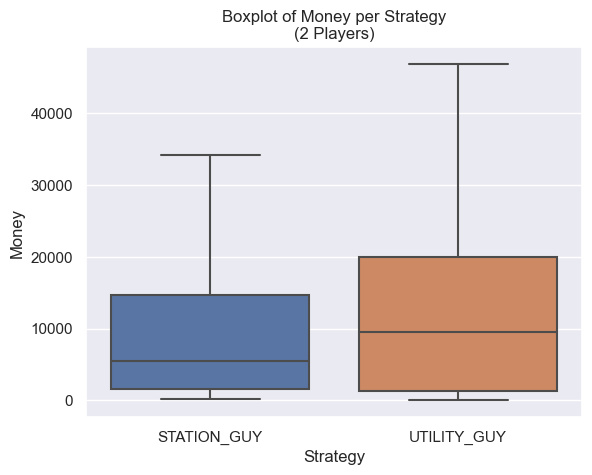

In [795]:
sns.boxplot(x='strategy', y='money', data=df, showfliers=False)
plt.title('Boxplot of Money per Strategy\n(2 Players)')
plt.xlabel('Strategy')
plt.ylabel('Money')
plt.show();

From the boxplot, on average, Station Guy and Utility Guy roughly win with the same amount of money. However, The spread of Utility Guy is larger.

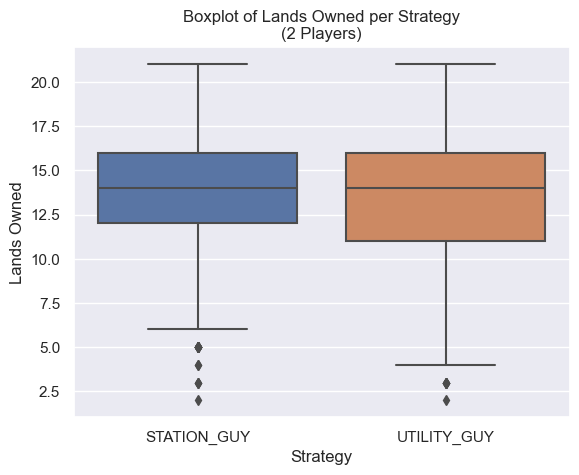

In [796]:
sns.boxplot(x='strategy', y='totalLandsOwned', data=df)
plt.title('Boxplot of Lands Owned per Strategy\n(2 Players)')
plt.xlabel('Strategy')
plt.ylabel('Lands Owned')
plt.show();

From the boxplot, on average, Station Guy and Utility Guy roughly win with the same number of lands owned. However, The spread of Utility Guy is larger.

## All!

In [797]:
df = pd.read_csv('./data/All5.csv')
df.head()

,strategy,money,countries,utilities,stations,totalLandsOwned
0,GREEDY,23231,12,0,1,13
1,GREEDY,21827,9,2,1,12
2,GREEDY,17991,10,1,0,11
3,GREEDY,30925,9,0,0,9
4,STATION_GUY,72972,4,0,1,5


In [798]:
df.groupby("strategy").median()

,money,countries,utilities,stations,totalLandsOwned
strategy,,,,,
DEFAULT,41840.0,7.0,0.0,1.0,8.0
GREEDY,22306.0,8.0,0.0,1.0,10.0
STATION_GUY,39085.0,5.0,0.0,1.0,7.0
STINGY,71761.0,4.0,0.0,0.0,5.0
UTILITY_GUY,38827.0,5.0,1.0,0.0,7.0


In [799]:
df['strategy'].value_counts(normalize=True)


GREEDY         0.541298
DEFAULT        0.179941
STATION_GUY    0.151917
UTILITY_GUY    0.107670
STINGY         0.019174
Name: strategy, dtype: float64

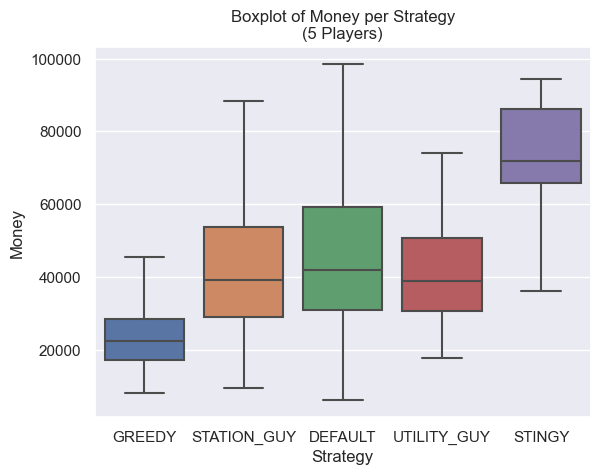

In [800]:
sns.boxplot(x='strategy', y='money', data=df, showfliers=False)
plt.title('Boxplot of Money per Strategy\n(5 Players)')
plt.xlabel('Strategy')
plt.ylabel('Money')
plt.show();

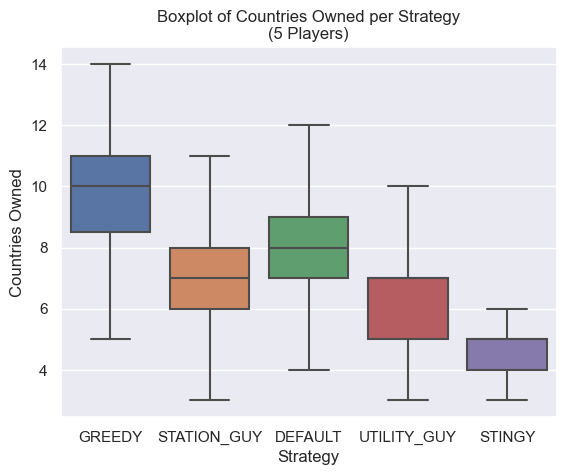

In [801]:
sns.boxplot(x='strategy', y='totalLandsOwned', data=df, showfliers=False)
plt.title('Boxplot of Countries Owned per Strategy\n(5 Players)')
plt.xlabel('Strategy')
plt.ylabel('Countries Owned')
plt.show();

## Does monopoly game tend to go to infinity 12% of the time?

In [802]:
df = pd.read_csv('./data_unused/DefaultDefault.csv')
df.head()

,strategy,money,countries,utilities,stations,totalLandsOwned
0,DEFAULT,9204.0,12.0,1.0,1.0,14.0
1,DEFAULT,8114.0,13.0,2.0,2.0,17.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,DEFAULT,494.0,5.0,2.0,2.0,9.0
4,DEFAULT,22393.0,12.0,1.0,2.0,15.0


In [803]:
df.shape

(10000, 6)

In [804]:
non_ending = df.isna().sum()[0]

In [805]:
## sample proportion is 12% ?

In [806]:
boots = []
for _ in range(1000):
    boot = df.sample(df.shape[0], replace=True)
    p_hat = boot.isna().sum()[0]/boot.shape[0]
    boots.append(p_hat)


(0.1203999, 0.122674025)

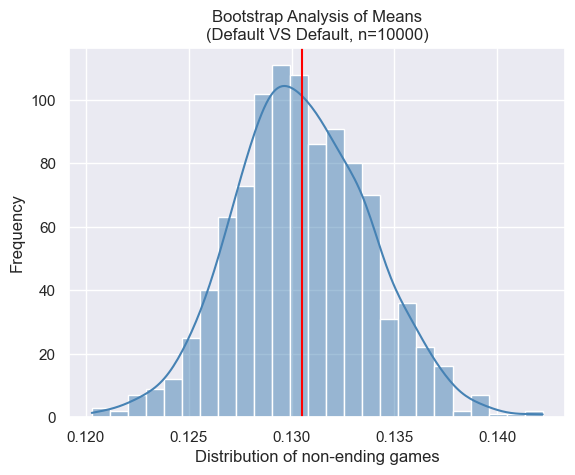

In [807]:
sns.histplot(boots, color='steelBlue', kde=True)
plt.xlabel("Distribution of non-ending games")
plt.ylabel("Frequency")
plt.title(f"Bootstrap Analysis of Means\n(Default VS Default, n={df.shape[0]})")
plt.axvline(np.mean(boots), color='red')
np.percentile(boots, 0.025), np.percentile(boots, 0.975)